<a href="https://colab.research.google.com/github/murali9192/Course/blob/master/Starter_code_Assignment_Melanoma_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

####Task1 Importing Skin Cancer Data
<b>Todo:</b> Take necessary actions to read the data

### Importing all the important libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!pip install -q keras

In [3]:
import pathlib
import os
import PIL

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
#%matplotlib inline

You are expected to load the data in the Colab environment by mounting the Google Drive. This will allow you to access the files from Google drive through Colab. 

Steps:
1. Upload the dataset in your Google Drive in a separate folder. Avoid spaces in the name of the folder or the zip file.
2. Mount the Google Drive using the code given below.
3. Unzip the file to access images.
4. Check the path for the datasets - train and test.


Note: The code is commented for you to learn and then make edits to execute the command.

In [4]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [5]:
# Your GDrive Directory
!ls /content/drive/MyDrive/Colab_Data/

CNN_assignment.zip  Untitled0.ipynb


In [6]:
# Unzipping the files
# To do: Update the folder name and file name
!unzip /content/drive/MyDrive/Colab_Data/CNN_assignment.zip

Archive:  /content/drive/MyDrive/Colab_Data/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
 

Check the path mentioned in the output: <b>Skin cancer ISIC The International Skin Imaging Collaboration</b>

Provide the path for train and test images using pathlib library.

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [7]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Test")

Check whether the data has been extracted successfully.

In [8]:
# Train and test images
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Train images:\t", image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print("Test images:\t", image_count_test)

Train images:	 2239
Test images:	 118


#### **Task 2: Loading the images using keras.preprocessing**

Let's load these images off disk using the helpful image_dataset_from_directory utility. You can refer to the following [link](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory) to know more about the function. You can even refer to the additional notebooks on the page to check how the variables are defined.

<b>Todo</b>: Create training and validation dataset

Define some parameters for the loader:

In [9]:
batch_size = 32
img_height = 180
img_width = 180

In [10]:
classes = ['actinic keratosis','basal cell carcinoma','dermatofibroma','melanoma',
               'nevus','pigmented benign keratosis','seborrheic keratosis',
               'squamous cell carcinoma','vascular lesion']

Use 80% of the images for training, and 20% for validation.

In [11]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(directory=data_dir_train,class_names = classes,
                                                               color_mode = "rgb", batch_size = batch_size,
                                                               image_size = (img_height,img_width), seed = 123,
                                                               validation_split = 0.2, subset = "training")




Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [12]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(directory=data_dir_train,class_names = classes,
                                                               color_mode = "rgb", batch_size = batch_size,
                                                               image_size = (img_height,img_width), seed = 123,
                                                               validation_split = 0.2, subset = "validation")

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [13]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


#### **Task 3: Visualize the data**

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

<b>Todo</b>: Create a code to visualize one instance of all the nine classes present in the dataset

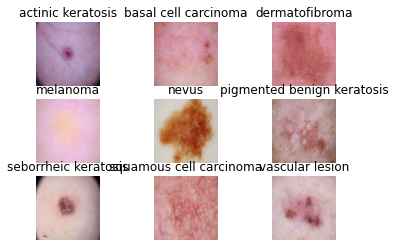

In [14]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
for images, labels in train_ds.take(1):
    for i in range(len(class_names)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[i])
        plt.axis("off")

#### Configure the dataset for performance
Let's make sure to use buffered prefetching so you can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### **Task 4: Model Building & training**
<b>Todo</b>: Create a CNN model, which can accurately detect 9 classes present in the dataset. 


* Note: The RGB channel values are in the `[0, 255]` range. 
* This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]`.
* Use `layers.experimental.preprocessing.Rescaling` for this purpose.

In [16]:
### Your code goes here
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(classes))
])


<b>Todo:</b> Compile the model<br>
Choose an appropirate optimiser and loss function for model training.

In [17]:
### Todo, choose an appropirate optimiser and loss function

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

<b>Todo:</b> Train the model

In [19]:
epochs = 20
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/20
56/56 [==============================] - 23s 71ms/step - loss: 2.0773 - accuracy: 0.2182 - val_loss: 1.9413 - val_accuracy: 0.3289
Epoch 2/20
56/56 [==============================] - 1s 23ms/step - loss: 1.7580 - accuracy: 0.3694 - val_loss: 1.6270 - val_accuracy: 0.4295
Epoch 3/20
56/56 [==============================] - 1s 23ms/step - loss: 1.4771 - accuracy: 0.4782 - val_loss: 1.4112 - val_accuracy: 0.4899
Epoch 4/20
56/56 [==============================] - 1s 23ms/step - loss: 1.3658 - accuracy: 0.5201 - val_loss: 1.3963 - val_accuracy: 0.5034
Epoch 5/20
56/56 [==============================] - 1s 23ms/step - loss: 1.2736 - accuracy: 0.5502 - val_loss: 1.3342 - val_accuracy: 0.5481
Epoch 6/20
56/56 [==============================] - 1s 23ms/step - loss: 1.1389 - accuracy: 0.5938 - val_loss: 1.3700 - val_accuracy: 0.5235
Epoch 7/20
56/56 [==============================] - 1s 23ms/step - loss: 1.0482 - accuracy: 0.6300 - val_loss: 1.4204 - val_accuracy: 0.5548
Epoch 8/20
5

#### Visualizing training results

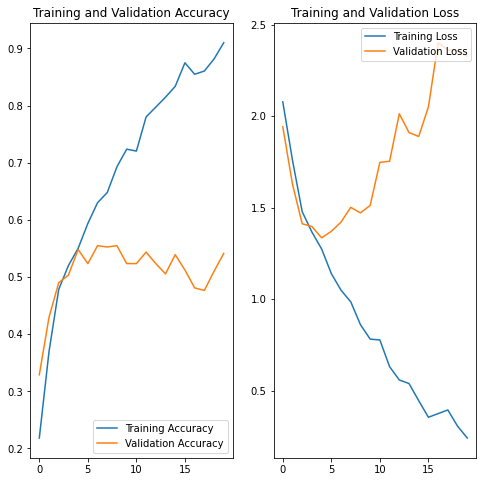

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Question**:
Write your findings after the model fit, see if there is an evidence of model overfit or underfit

There is a clear case of overfitting wherein the training accuracy is extremely high but the validation accuracy hovers is very low. This large difference (with higher training accuracy) depicts  overfitting.

#### Task5: Data augmentation
Overfitting generally occurs when there are a small number of training examples. [Data augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation) takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.


<b>Todo:</b> After you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy

In [21]:
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                                                   input_shape=(img_height, img_width, 3)),
                                                                                   layers.experimental.preprocessing.RandomRotation(0.1),
                                                                                    layers.experimental.preprocessing.RandomZoom(0.1),])

Let's visualize what a few augmented examples look like by applying data augmentation to the same image several times

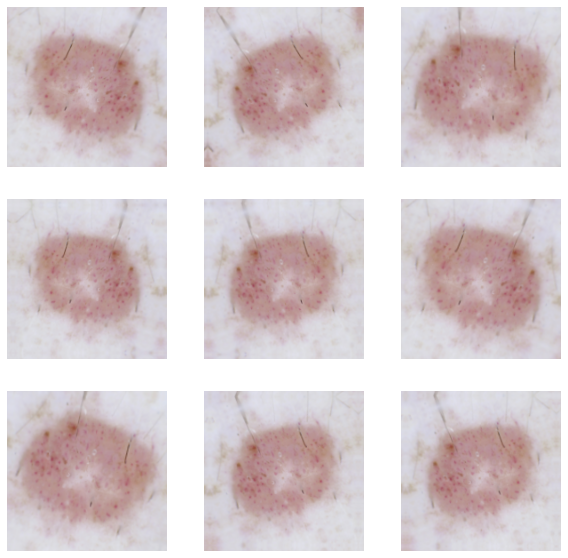

In [22]:
# Visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

#### Task 6: Create, compile and train the model**
<b>Todo:</b> Define the model with augmentation strategy defined earlier

In [23]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(classes))
])

<b>Todo:</b> Compile the model

In [24]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

<b>Todo:</b> Train the model

In [25]:
## Your code goes here, note: train your model for 20 epochs

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 3s 30ms/step - loss: 2.0866 - accuracy: 0.2109 - val_loss: 1.7873 - val_accuracy: 0.4116
Epoch 2/20
56/56 [==============================] - 1s 25ms/step - loss: 1.6199 - accuracy: 0.4342 - val_loss: 1.4892 - val_accuracy: 0.5213
Epoch 3/20
56/56 [==============================] - 1s 26ms/step - loss: 1.4170 - accuracy: 0.5067 - val_loss: 1.4107 - val_accuracy: 0.5347
Epoch 4/20
56/56 [==============================] - 1s 26ms/step - loss: 1.3476 - accuracy: 0.5229 - val_loss: 1.4029 - val_accuracy: 0.5302
Epoch 5/20
56/56 [==============================] - 1s 26ms/step - loss: 1.3126 - accuracy: 0.5329 - val_loss: 1.3105 - val_accuracy: 0.5324
Epoch 6/20
56/56 [==============================] - 1s 26ms/step - loss: 1.2833 - accuracy: 0.5391 - val_loss: 1.3636 - val_accuracy: 0.5570
Epoch 7/20
56/56 [==============================] - 1s 26ms/step - loss: 1.2389 - accuracy: 0.5586 - val_loss: 1.3640 - val_accuracy: 0.5235
Epoch 8/20
56

#### Visualizing the results

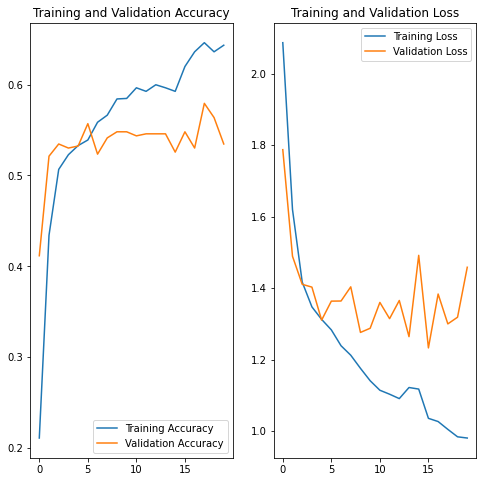

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Question**:
Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Though there is a reduction in training accuracy, the validation accuracy has been optimum. Most importantly, the difference between training accuracy and validation accuracy has diminished.

#### Task7: Class distribution

Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.



<b>Todo:</b> Find the distribution of classes in the training dataset.**

In [27]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
print(len(path_list))

2239


In [28]:
#create the dataframe containing all the path and their labels
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df.head()

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,dermatofibroma
1,Skin cancer ISIC The International Skin Imagin...,dermatofibroma
2,Skin cancer ISIC The International Skin Imagin...,dermatofibroma
3,Skin cancer ISIC The International Skin Imagin...,dermatofibroma
4,Skin cancer ISIC The International Skin Imagin...,dermatofibroma


                            count  percentage
seborrheic keratosis           77         3.4
dermatofibroma                 95         4.2
actinic keratosis             114         5.1
vascular lesion               139         6.2
squamous cell carcinoma       181         8.1
nevus                         357        15.9
basal cell carcinoma          376        16.8
melanoma                      438        19.6
pigmented benign keratosis    462        20.6


([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

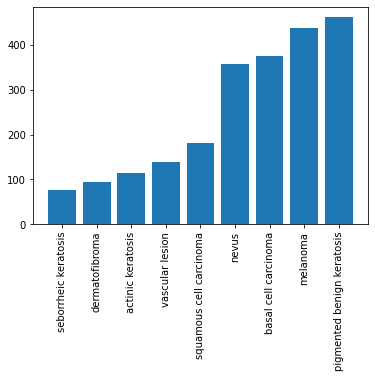

In [29]:
## Visualise the distribution of each labels from the dataframe
## Your code goes here.
#label_lists = pd.DataFrame(original_df.groupby(['Label']).count())
#label_lists.columns = ['Label','Count']
#label_lists.head()
#dft = label_lists.set_index('Label').T
##dft.plot(kind='bar', rot=0)

class_count = {}
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
for i in class_names:
    data_dir = pathlib.Path(path_to_training_dataset + i)
    image_count = len(list(data_dir.glob('*.jpg')))
    class_count[i] = image_count

df = pd.DataFrame(class_count.values(), index=class_count.keys(), columns=['count'])
df['percentage'] = round(100 * df['count']/df['count'].sum(), 1)
print(df.sort_values(by=['count']))

class_count = {k: v for k, v in sorted(class_count.items(), key=lambda item: item[1])}
plt.bar(class_count.keys(), height=class_count.values())
plt.xticks(rotation=90)

#### **Questions:**  
 - Which class has the least number of samples?
 - Which classes dominate the data in terms proportionate number of samples?


**seborrheic keratosis** has the least number of samples.
**pigmented benign keratosis** classes dominate the data in terms of proportionate number of samples.

#### **Task 8: Rectifying the class imbalance**
You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.<br>
<b>Todo:</b> Apply augmentor

In [30]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [31]:
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCA270ED4D0>: 100%|██████████| 500/500 [00:18<00:00, 26.90 Samples/s]


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCA2711FE10>: 100%|██████████| 500/500 [00:18<00:00, 26.61 Samples/s]


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FCA270A80D0>: 100%|██████████| 500/500 [00:20<00:00, 24.95 Samples/s]


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=962x645 at 0x7FCA271D6F90>: 100%|██████████| 500/500 [01:34<00:00,  5.27 Samples/s]


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FCA27123B10>: 100%|██████████| 500/500 [01:26<00:00,  5.75 Samples/s]


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FCA27267DD0>: 100%|██████████| 500/500 [00:16<00:00, 31.00 Samples/s]


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FCA2716D0D0>: 100%|██████████| 500/500 [00:38<00:00, 13.14 Samples/s]


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCA271C5ED0>: 100%|██████████| 500/500 [00:16<00:00, 30.39 Samples/s]


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FCA27182150>: 100%|██████████| 500/500 [00:15<00:00, 31.47 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [32]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


Lets see the distribution of augmented data after adding new images to the original training data.

In [33]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0028790.jpg_2ce98478-0058-4bc4-a980-9417870d93ba.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0030870.jpg_1c5a88e6-4170-463d-a784-8ef70662f69d.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0025771.jpg_bbc14f0a-e51d-42c4-9398-c824c20bf3bc.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0029962.jpg_7edc0cd5-7753-4056-80fd-58a241d1e535.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0029248.jpg_135b3fe4-a986-4cd6-9fb1-e89390d58c26.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC

In [34]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofib

In [35]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [36]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [38]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Task9: Model Building & training
<b>Todo:</b> Train the model on the data created using Augmentor

In [39]:
batch_size = 32
img_height = 180
img_width = 180

<b>Todo:</b> Create a training dataset

In [40]:
data_dir_train=pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


<b>Todo:</b> Create a validation dataset

In [41]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


<b>Todo:</b> Create your model (make sure to include normalization)

In [42]:
## your code goes here
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(classes))
])

<b>Todo:</b> Compile your model (Choose optimizer and loss function appropriately)

In [43]:
## your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

<b>Todo:</b>  Train your model

In [44]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 29s 152ms/step - loss: 1.8270 - accuracy: 0.2953 - val_loss: 1.4761 - val_accuracy: 0.4373
Epoch 2/50
169/169 [==============================] - 24s 137ms/step - loss: 1.4766 - accuracy: 0.4392 - val_loss: 1.4057 - val_accuracy: 0.5011
Epoch 3/50
169/169 [==============================] - 25s 141ms/step - loss: 1.3560 - accuracy: 0.4829 - val_loss: 1.2754 - val_accuracy: 0.5137
Epoch 4/50
169/169 [==============================] - 24s 136ms/step - loss: 1.2858 - accuracy: 0.5121 - val_loss: 1.1336 - val_accuracy: 0.5768
Epoch 5/50
169/169 [==============================] - 24s 137ms/step - loss: 1.1955 - accuracy: 0.5423 - val_loss: 1.1522 - val_accuracy: 0.5657
Epoch 6/50
169/169 [==============================] - 24s 137ms/step - loss: 1.1539 - accuracy: 0.5573 - val_loss: 1.1591 - val_accuracy: 0.5546
Epoch 7/50
169/169 [==============================] - 24s 137ms/step - loss: 1.0994 - accuracy: 0.5836 - val_loss: 1.0450 - val_ac

<b>Todo:</b>  Visualize the model results

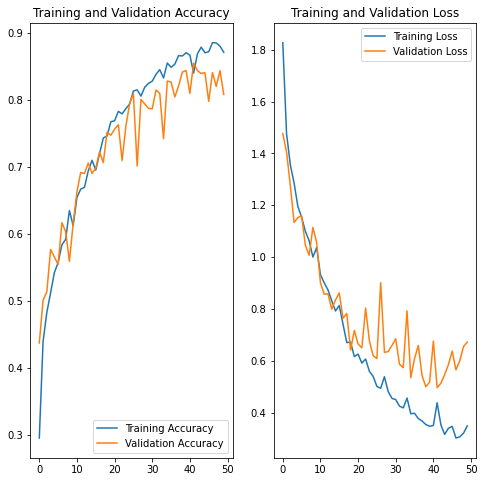

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Task 10: Analyzing the results

#### **Question:**
- Did you get rid of underfitting/overfitting from the model? 
- Did class rebalance help in the process?


The problem of overfitting was addressed up to certain extent prior augmentation also, but the training accuracy was very low. Fortunately, the augmentation problem has massively contributed towards higher accuracy of the model, in addition to resultion of overfitting issues leading to creation of a generalized model.